In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('ggplot')
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.cmap'] = 'magma'
plt.cm.magma.set_bad('black')
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.interpolation'] = 'nearest'
from matplotlib.colors import LogNorm

In [3]:
from astropy.io import fits

In [91]:
ex = fits.open('../synthetic/outputs/TwoGalaxies-A/delta_mag_1/delta_z_1.0/sep_1.250_arcsec.fits')

In [94]:
repr(fits.HDUList().filename())

'None'

In [17]:
img = ex['TRUTH'].data[0]

In [18]:
from astropy.visualization import SqrtStretch, LogStretch, ZScaleInterval
from astropy.visualization.mpl_normalize import ImageNormalize

In [19]:
interval = ZScaleInterval()

In [20]:
vmin, vmax = interval.get_limits(img)

In [21]:
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

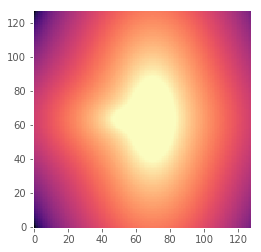

In [22]:
plt.imshow(img, norm=norm)

In [23]:
norm(img)

masked_array(data =
 [[0.0 0.08107680800950108 0.1342388906547121 ..., 0.37883253980088905
  0.3653638250503287 0.3510798784109968]
 [0.04557564096046579 0.10957748192156097 0.15513022433784837 ...,
  0.38430111392401717 0.3711154433725261 0.3571661421796397]
 [0.08084516207487719 0.13384684138109268 0.17374644029579955 ...,
  0.3896387483777259 0.37671862071382084 0.36308204008127487]
 ..., 
 [0.08084516207487719 0.13384684138109268 0.17374644029579955 ...,
  0.3896387483777259 0.37671862071382084 0.36308204008127487]
 [0.04557564096046579 0.10957748192156097 0.15513022433784837 ...,
  0.38430111392401717 0.3711154433725261 0.35716614217963955]
 [0.0 0.08107680800950108 0.1342388906547121 ..., 0.37883253980088905
  0.3653638250503287 0.3510798784109968]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., Fals

In [83]:
def quick_rgb(image_red, image_green, image_blue, contrast=0.25):
    interval = ZScaleInterval(contrast=contrast)
    red_min, red_max = interval.get_limits(image_red)
    green_min, green_max = interval.get_limits(image_green)
    blue_min, blue_max = interval.get_limits(image_blue)
    vmin, vmax = min(red_min, green_min, blue_min), max(red_max, green_max, blue_max)
    rgbim = np.zeros(image_red.shape + (3,), dtype=np.uint8)
    for idx, im in enumerate((image_red, image_green, image_blue)):
        print('.')
        norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch(), clip=True)
        plt.figure()
        plt.subplot(121)
        plt.imshow(im, norm=norm)
        plt.colorbar()
        plt.subplot(122)
        rescaled = (norm(im) * 255).astype(np.uint8)
        rgbim[:,:,idx] = rescaled
        plt.imshow(rescaled)
        plt.colorbar()
    return rgbim

.
.
.


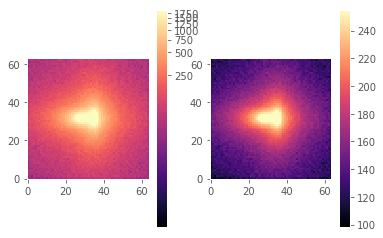

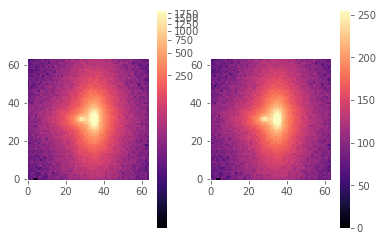

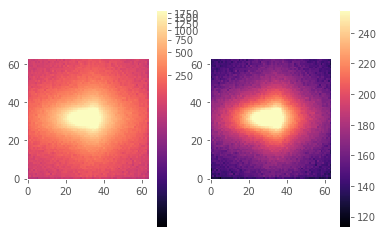

In [89]:
data = quick_rgb(ex['BLENDED'].data[1], ex['BLENDED'].data[0], ex['BLENDED'].data[2], contrast=0.125)

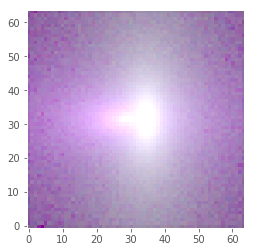

In [86]:
plt.imshow(data)

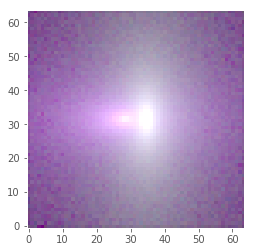

In [90]:
plt.imshow(data)

In [ ]:
rgbim 

In [37]:
data

masked_array(data =
 [[0.0 0.08107680800950108 0.1342388906547121 ..., 0.37883253980088905
  0.3653638250503287 0.3510798784109968]
 [0.04557564096046579 0.10957748192156097 0.15513022433784837 ...,
  0.38430111392401717 0.3711154433725261 0.3571661421796397]
 [0.08084516207487719 0.13384684138109268 0.17374644029579955 ...,
  0.3896387483777259 0.37671862071382084 0.36308204008127487]
 ..., 
 [0.08084516207487719 0.13384684138109268 0.17374644029579955 ...,
  0.3896387483777259 0.37671862071382084 0.36308204008127487]
 [0.04557564096046579 0.10957748192156097 0.15513022433784837 ...,
  0.38430111392401717 0.3711154433725261 0.35716614217963955]
 [0.0 0.08107680800950108 0.1342388906547121 ..., 0.37883253980088905
  0.3653638250503287 0.3510798784109968]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., Fals

In [38]:
np.max(data)

1.533593049926363